**Universidade Estadual de Campinas - Unicamp**

**Faculdade de Tecnologia - FT**

**Autor:** Ulisses Martins Dias

**Disciplina:** TT003 - Tópicos em Computação e Informática III

**Atividade 04:** Rede Neural

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ulissesdias/tt003/blob/main/atividades/atividade04.ipynb)

## Operadores Binários

Vamos agora realizar um experimento similar a um dos exemplos em sala de aula, fazer uma rede neural básica aprender a função ((A and B) or (C and D)) que aprendemos logo no início dos nossos cursos de computação. Entretanto, esta função que iremos aprender contém 4 entradas. Nesse caso, temos $2^4 = 16$ possibilidades na tabela verdade.


**Input 1** | **Input 2** | **Input 3** | **Input 4** | **Target**
------------|-------------|-------------|-------------|-------
0 | 0 | 0 | 0 | 0
0 | 0 | 0 | 1 | 0
0 | 0 | 1 | 0 | 0
0 | 0 | 1 | 1 | 1
0 | 1 | 0 | 0 | 0
0 | 1 | 0 | 1 | 0
0 | 1 | 1 | 0 | 0
0 | 1 | 1 | 1 | 1
1 | 0 | 0 | 0 | 0
1 | 0 | 0 | 1 | 0
1 | 0 | 1 | 0 | 0
1 | 0 | 1 | 1 | 1
1 | 1 | 0 | 0 | 1
1 | 1 | 0 | 1 | 1
1 | 1 | 1 | 0 | 1
1 | 1 | 1 | 1 | 1


A dificuldade agora é que você terá muito menos suporte do que nas aulas anteriores deste notebook, dado que é necessário que você tenha mais autonomia para prosseguir na disciplina. Por exemplo, não serão fornecidas a você as entradas e as saídas, é esperado que você consiga criar manualmente usando *torch.tensor*. Apenas para lhe ajudar com um $\epsilon$, abaixo eu lhe mostro como eu começaria em Python convencional. Talvez seja mais interessante criar os vetores em Python convencional e depois gerar os tensores.

In [ ]:
import numpy as np
def logical_operator(a,b,c,d) :
    result = np.logical_or(np.logical_and(a, b), np.logical_and(c, d))
    return result.astype(int)


In [ ]:

import torch


x = [[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
      [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
      [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
      [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]]


y = [logical_operator(x[0], x[1],x[2],x[3]).tolist()]

print(y)


x = torch.tensor(x).T.to(torch.float)
y = torch.tensor(y).T.to(torch.float)

xx = x
yy = y




[[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]]


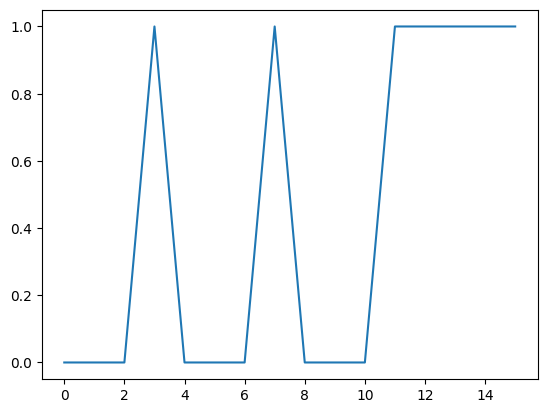

In [ ]:
import matplotlib.pyplot as plt

plt.plot(torch.arange(16), y)

In [ ]:
import torch.nn as nn
import torch.optim as optim
model = nn.Sequential(
    nn.Linear(4, 3),
    nn.Sigmoid(),
    nn.Linear(3, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1),
    nn.Sigmoid()
)


In [ ]:
loss_fn = torch.nn.BCELoss()
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 1000


In [ ]:
for t in range(num_epochs):
    y_pred = model(xx)

    loss = loss_fn(y_pred, yy)

    if t % 1000 == 0 :
        print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Atualizar os pesos usando a descida por gradiente, como fizemos anteriormente.
    # Cada parâmetro é um Tensor,então podemos acessar seus gradientes como
    # fizemos antes.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Limpamos os gradientes antes de executar o backward pass.
    model.zero_grad()

0 0.7229908108711243


tensor([[0.0024],
        [0.0030],
        [0.0034],
        [0.9832],
        [0.0027],
        [0.0120],
        [0.0118],
        [0.9880],
        [0.0043],
        [0.0050],
        [0.0041],
        [0.9867],
        [0.9855],
        [0.9842],
        [0.9847],
        [0.9884]], grad_fn=<SigmoidBackward0>)

ORIGINAL
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])


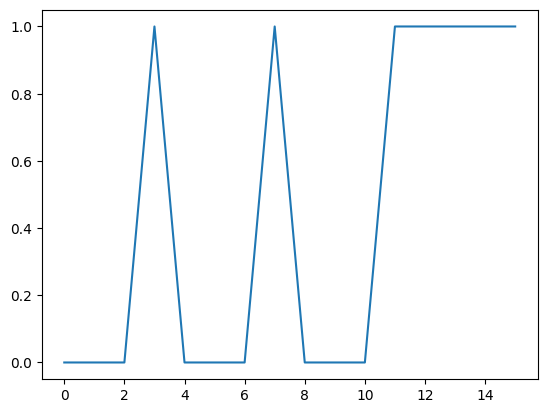

In [ ]:
import matplotlib.pyplot as plt

print("ORIGINAL")
print(y)
plt.plot(torch.arange(16), y)


PREDITO
tensor([[0.0024],
        [0.0030],
        [0.0034],
        [0.9832],
        [0.0027],
        [0.0120],
        [0.0118],
        [0.9880],
        [0.0043],
        [0.0050],
        [0.0041],
        [0.9867],
        [0.9855],
        [0.9842],
        [0.9847],
        [0.9884]])


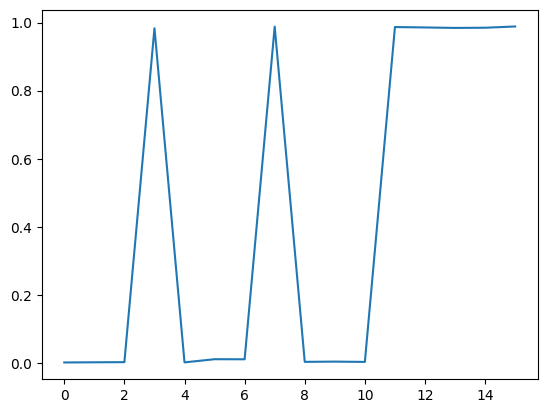

In [ ]:
print("PREDITO")
torch.set_printoptions(sci_mode=False)
print(torch.tensor(model(xx).tolist()))
plt.plot(torch.arange(16), model(xx).tolist())

Nesta atividade, você será avaliado por cumprir os seguintes itens.

1. Consegue gerar a entrada: as *features* em uma variável $x$ e o *target* em uma variável $y$.
2. Consegue criar uma rede usando o *Sequential*.
3. Consegue usar camadas *Linear* e *Sigmoid* com as funções do Pytorch.
4. Consegue usar uma função de custo. Escolha entre MSELoss ou BCELoss e explique no vídeo o motivo da escolha (na dúvida, teste as duas e explique a que se saiu melhor, ou se as duas foram igualmente bem).
5. Consegue executar um treinamento e convergir para uma loss baixa.

A sua resposta será, como sempre, um vídeo mostrando as suas análises.
